**Part 1**

**What's the problem with random networks as a model for real-world networks according to the argument in section 3.5 (near the end)?**

It's missing the cluster effect


**List the four regimes that characterize random networks as a function of ⟨k⟩.**

**Subcritical regime: 0 < ⟨k⟩ < 1**
So few links in the network, so only very small clusters. So the largest cluster is the giant component, but the largest cluster is a tree of size N_G ~ lnN, but the relative size of this converts to zero since: N_G/N ≃ lnN/N→0 in the N→∞ limit

**Critical point: ⟨k⟩ = 1**
Still no giant component, since the relative size of the largest component is still zero. 
The size of the largest component is N_G ~ N^(2/3), so the relative size is: N_G/N ~ N^(2/3)/N = N^(-1/3) which converts to 0 for N → ∞.

**Supercritical regime: ⟨k⟩ > 1**
The giant component now looks like a network with loops and cycles.
The relative size of the giant component is 
NG/N ∼ ⟨k⟩ − 1 (close to the supercritical point)
or
NG ∼ (p-p_c)N  (p_c = 1/(N−1) ≈ 1/N
The giant component contains a finite fraction of the nodes. The further we move from the critical point, a larger fraction of nodes will belong to it.
The supercritical regime lasts until all nodes are absorbed by the giant component.

**Connected regime: ⟨k⟩ > ln(N)**


In [20]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

G1 = nx.watts_strogatz_graph(500, 4, 0)
G2 = nx.watts_strogatz_graph(500, 4, 0.1)
G3 = nx.watts_strogatz_graph(500, 4, 1)

graphs = [G1, G2, G3]
titles = ["p=0", "p=0.1", "p=1"]


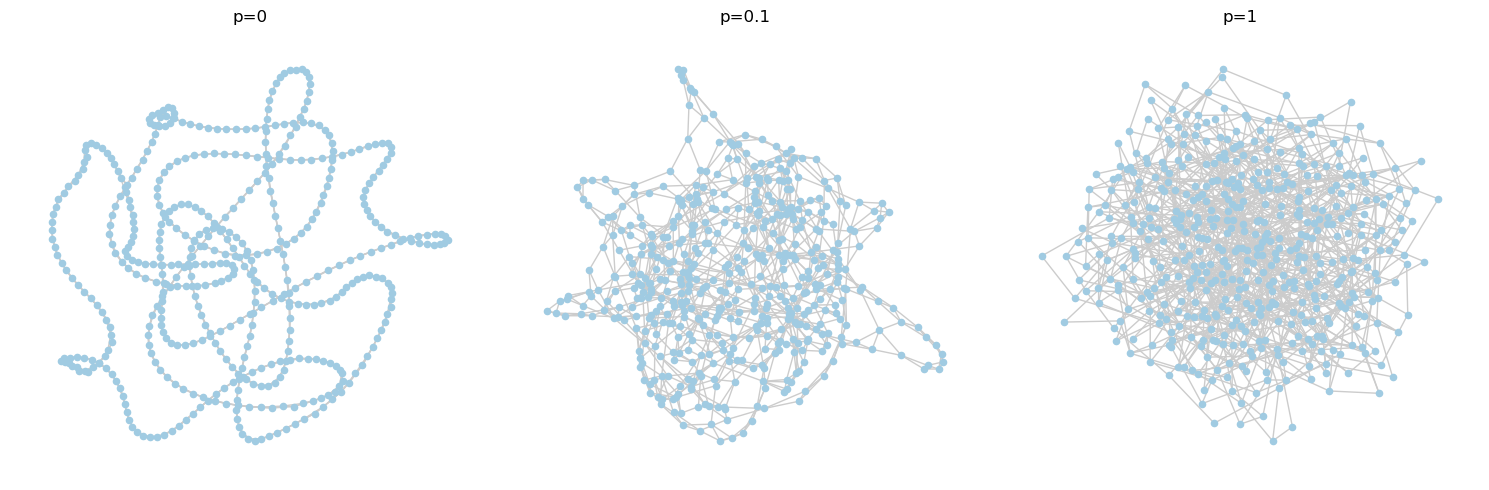

In [21]:
plt.figure(figsize=(15, 5))
for i, (G, title) in enumerate(zip(graphs, titles), 1):
    plt.subplot(1, 3, i)
    nx.draw(
        G,
        node_size=20,
        node_color="#A0CBE2",
        edge_color="#cccccc",
        with_labels=False
    )
    plt.title(title)

plt.tight_layout()
plt.show()


In [22]:
for i, G in enumerate(graphs, 1):
    print(f"G{i}: Average shortest path length = {nx.average_shortest_path_length(G)}")

G1: Average shortest path length = 62.875751503006015
G2: Average shortest path length = 7.767895791583166
G3: Average shortest path length = 4.755687374749499


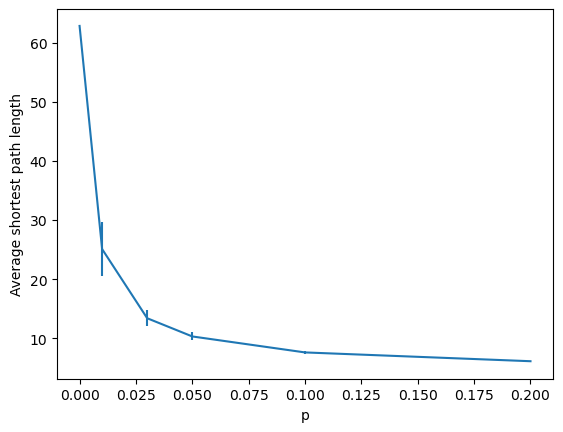

In [41]:
N = 500
k = 4
p = 0.01

p_values = [0, 0.01, 0.03, 0.05, 0.1, 0.2]
means =[]
stds = []

for p in p_values:
    lengths = []
    for _ in range(50):
        G = nx.watts_strogatz_graph(N, k, p)
        l = nx.average_shortest_path_length(G)
        lengths.append(l)

    p_avg = np.mean(lengths)
    p_std = np.std(lengths)

    means.append(p_avg)
    stds.append(p_std)

plt.errorbar(p_values, means, stds)
plt.xlabel("p")
plt.ylabel("Average shortest path length")
plt.show()

